In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
train=pd.read_csv("/content/drive/My Drive/dse/HR_analytics/train.csv")
test=pd.read_csv("/content/drive/My Drive/dse/HR_analytics/test.csv")

In [0]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
train.shape

(54808, 14)

## Univariate Analysis

### Sales & Marketing have maximum employees..least employees in R&D

Most employees have Bachelor's education and very few have below secondary education..around 15000 employees have Masters and above

<Figure size 432x288 with 0 Axes>

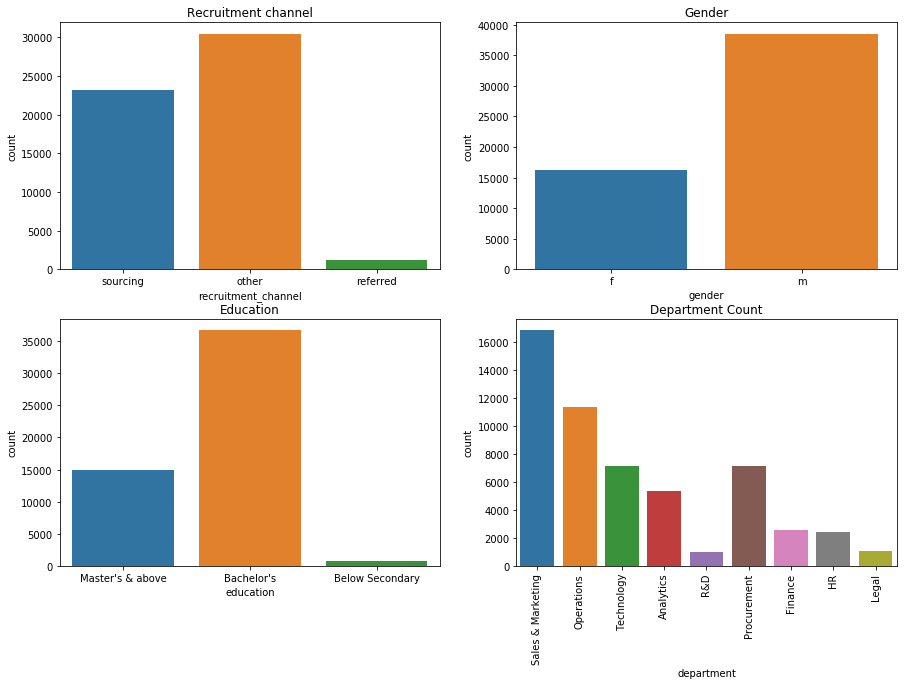

In [0]:
plt.figure(1)

plt.figure(figsize=[15,10])
plt.subplot(221)
sns.countplot(train.recruitment_channel)
plt.title("Recruitment channel")

plt.subplot(222)
sns.countplot(train.gender)
plt.title("Gender")

plt.subplot(223)
sns.countplot(train.education)
plt.title("Education")

plt.subplot(224)
sns.countplot(train.department)
plt.title("Department Count")
plt.xticks(rotation=90)
plt.show()

#### Univariate Analysis for numeric columns

In [0]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

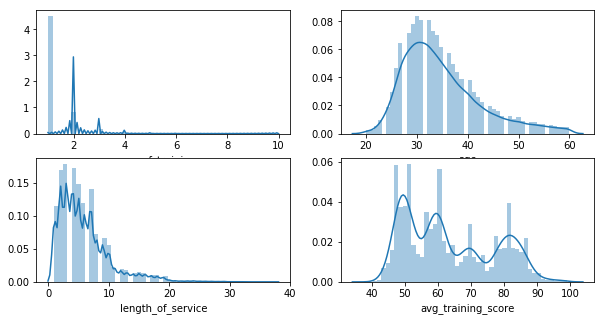

In [0]:
plt.figure(1)
plt.figure(figsize=[10,5])
plt.subplot(221)
sns.distplot(train.no_of_trainings)

plt.subplot(222)
sns.distplot(train.age)

plt.subplot(223)
sns.distplot(train.length_of_service)

plt.subplot(224)
sns.distplot(train.avg_training_score)

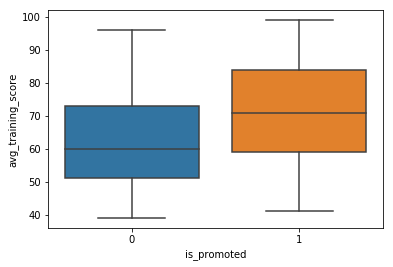

In [0]:
sns.boxplot(train.is_promoted,train.avg_training_score)

In [0]:
# Average training score is one imp feature

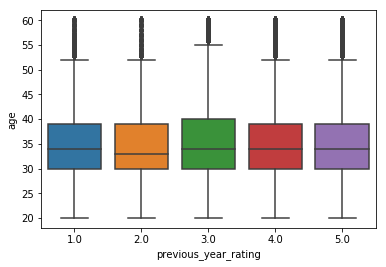

In [0]:
sns.boxplot(x="previous_year_rating",y="age",data=train)

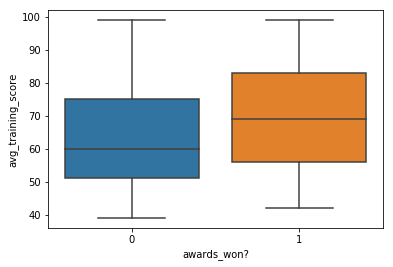

In [0]:
sns.boxplot(train["awards_won?"],train.avg_training_score)

In [0]:
train[["awards_won?","avg_training_score","KPIs_met >80%"]].corr()

,awards_won?,avg_training_score,KPIs_met >80%
awards_won?,1.000000,0.072138,0.097000
avg_training_score,0.072138,1.000000,0.078391
KPIs_met >80%,0.097000,0.078391,1.000000


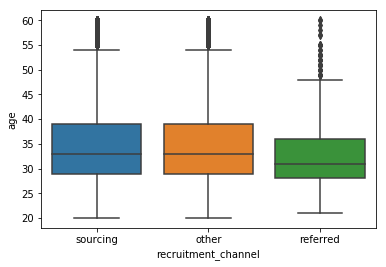

In [0]:
sns.boxplot(train.recruitment_channel,train.age)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

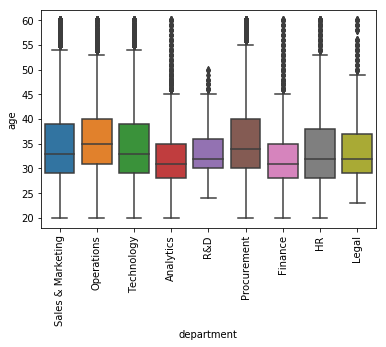

In [0]:
sns.boxplot(train.department,train.age)
plt.xticks(rotation=90)

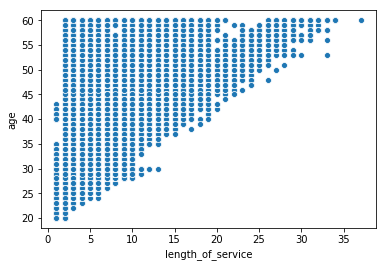

In [0]:
sns.scatterplot(train.length_of_service,train.age)

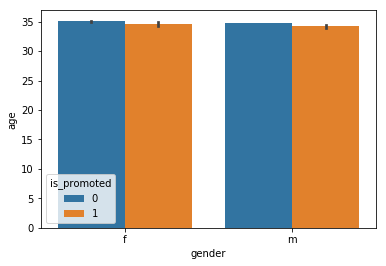

In [0]:
sns.barplot(train.gender,train.age,hue=train['is_promoted'])

In [0]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

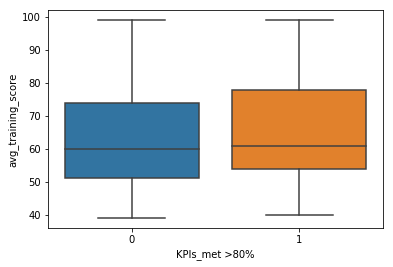

In [0]:
sns.boxplot(train["KPIs_met >80%"],train.avg_training_score)

In [0]:
train["awards_won?"].nunique()

2

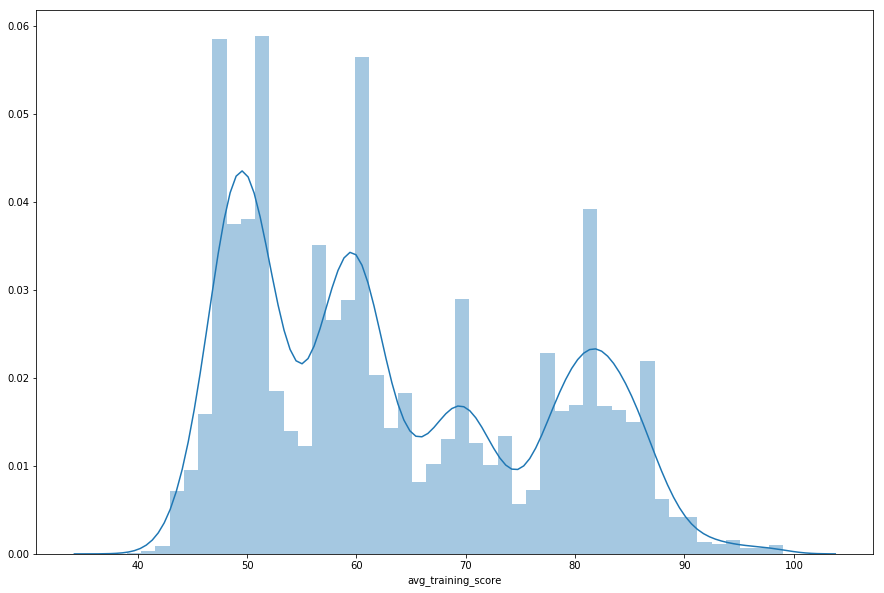

In [0]:
plt.figure(figsize=[15,10])
sns.distplot(train.avg_training_score)

## NULL VALUES

In [0]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [0]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [0]:
train.education.fillna("Bachelor's", inplace =True)
test.education.fillna("Bachelor's", inplace =True)

In [0]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [0]:
train.previous_year_rating.fillna(3.0,inplace=True)
test.previous_year_rating.fillna(3.0,inplace=True)

In [0]:
test.previous_year_rating.value_counts()

3.0    9733
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: previous_year_rating, dtype: int64

In [0]:
def Age_cat(x):
    if (x>20 and x<=30):
        return "Youngsters"
    if (x>30 and x<=45):
        return "Adults"
    else:
        return "Senior Employees"

In [0]:
def Avg_training(x):
    if (x>35 and x<=55):
        return " very low_score"
    if (x>55 and x<=65):
        return "Low_score"
    if (x>65 and x<=75):
        return "Average_score"
    else:
        return "Good_score"

In [0]:
train["Age_Cat"]=train["age"].apply(Age_cat)
test["Age_Cat"]=test["age"].apply(Age_cat)

In [0]:
train["Avg_training"]=train["avg_training_score"].apply(Avg_training)
test["Avg_training"]=test["avg_training_score"].apply(Avg_training)

In [0]:
print(train.shape)
print(test.shape)

(54808, 20)
(23490, 19)


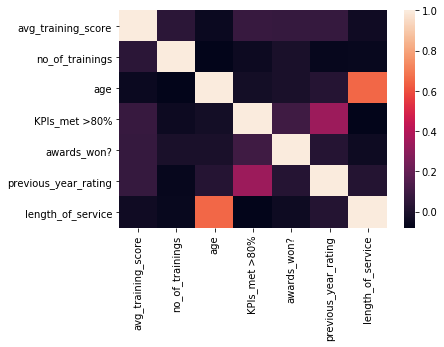

In [0]:
sns.heatmap(train[["avg_training_score","no_of_trainings","age","KPIs_met >80%","awards_won?","previous_year_rating","length_of_service"]].corr())

In [0]:
train["promotion_likely"]=train["no_of_trainings"]*train["avg_training_score"]*train.age
test["promotion_likely"]=test["no_of_trainings"]*test["avg_training_score"]*test.age

In [0]:
train["len_Age"]=train.length_of_service*train.age
test["len_Age"]=test.length_of_service*test.age

In [0]:
train["KPI_Rating"]=train["KPIs_met >80%"]*train["previous_year_rating"]
test["KPI_Rating"]=test["KPIs_met >80%"]*test["previous_year_rating"]

In [0]:
train["KPI_Award"]=train["KPIs_met >80%"]*train["awards_won?"]
test["KPI_Award"]=test["KPIs_met >80%"]*test["awards_won?"]

In [0]:
train["Training_Rating"]=train["previous_year_rating"]*train["avg_training_score"]
test["Training_Rating"]=test["previous_year_rating"]*test["avg_training_score"]

In [0]:
newtrain=train.drop(["employee_id","region","is_promoted","recruitment_channel",'KPIs_met >80%','awards_won?','Age_Cat',"no_of_trainings"],axis=1)
newtest=test.drop(["employee_id","region","recruitment_channel",'KPIs_met >80%','awards_won?','Age_Cat',"no_of_trainings"],axis=1)

In [0]:
newtrain.columns

Index(['department', 'education', 'gender', 'age', 'previous_year_rating',
       'length_of_service', 'avg_training_score', 'Avg_training',
       'promotion_likely', 'len_Age', 'KPI_Rating', 'KPI_Award',
       'Training_Rating'],
      dtype='object')

In [0]:
dummytrain=pd.get_dummies(newtrain)
dummytest=pd.get_dummies(newtest)

In [0]:
print(dummytrain.shape)
print(dummytest.shape)

(54808, 27)
(23490, 27)


In [0]:
sc=StandardScaler()

In [0]:
scaled_train=pd.DataFrame(sc.fit_transform(dummytrain),columns=dummytrain.columns)

In [0]:
scaled_test=pd.DataFrame(sc.fit_transform(dummytest),columns=dummytest.columns)

In [0]:
x=scaled_train
y=train.is_promoted

In [0]:
rf=RandomForestClassifier(criterion="entropy")

In [0]:
#gbm=GradientBoostingClassifier()

In [0]:
rfmodel=rf.fit(x,y).predict(scaled_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
rfmodel # accuracy with simple random forest 0.43990573448546744.
# with all features ---- 0.4388032638259293.
# with gradient boost----0.4388032638259293.
# with age in promotion likely-----: 0.4587458745874587. and gradient boost gave  : 0.45024154589371984.
#with len and age together 0.44818871103622576.
#not good accurracy with ada boost.
#LGB with threshold >0.09 0.3575418994413408.
#LGB with threshold >0.08 0.31534719150818225.
#LGB with threshold >0.1 0.42012356575463367.
#LGB with age in promotion likely and threshold >0.1--- 0.4540901502504174.
#LGB with age in promotion likely and threshold >0.9---- 0.42012356575463367.
#RF without training category 0.41674418604651164.
# RF without education  0.4511970534069983.
#LGB without education 0.3677298311444653.
#LGB without education and thres>0.8 0.37465564738292007.
#RF with all the correalted field--- 0.4482758620689656.
# LGB with all the correalted field-----0.38541666666666674..
# RF ---- : 0.4533333333333334.

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [0]:
#ada=AdaBoostClassifier(base_estimator=rf)

In [0]:
#adamodel=ada.fit(x,y).predict(scaled_test)

In [0]:
solution = pd.DataFrame({"employee_id":test.employee_id, "is_promoted": rfmodel})

In [0]:
from google.colab import files
solution.to_csv("HRAnalyticsRF1New.csv", index=False)
files.download("HRAnalyticsRF1New.csv")

In [0]:
new_df=pd.DataFrame(rf.feature_importances_,index=scaled_train.columns,columns=["features"]).sort_values("features", ascending=False)

In [0]:
new_df

,features
promotion_likely,0.290984
len_Age,0.174189
KPI_Rating,0.070007
length_of_service,0.067653
previous_year_rating,0.053690
department_Sales & Marketing,0.046274
KPIs_met >80%,0.043096
department_Operations,0.035122
department_Procurement,0.034995
awards_won?,0.026635


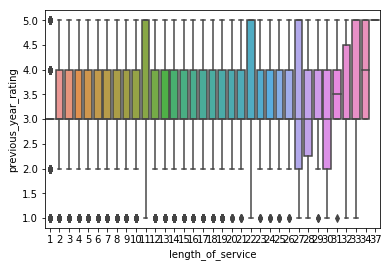

In [0]:
sns.boxplot(train.length_of_service,train.previous_year_rating)

In [0]:
train.length_of_service.describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

In [0]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Avg_training,promotion_likely,len_Age
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,very low_score,49,280
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Low_score,60,120
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,very low_score,50,238
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,very low_score,100,390
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Average_score,73,90


In [0]:
#train[train["is_promoted"]==1]["Age_Cat"].value_counts()

In [0]:
import lightgbm as lgb

In [0]:
train_data=lgb.Dataset(x,label=y)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(scaled_test)

In [0]:
y_pred

array([0.09204905, 0.0774449 , 0.0774449 , ..., 0.0774449 , 0.07979465,
       0.17226904])

In [0]:
y_predN=[]
for i in range(0,23490):
  if y_pred[i]>=0.1:
    y_predN.append(1)
  else:
    y_predN.append(0)

In [0]:
y_predN

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
